# Análise de Dados Exploratória da População Mundial

## 1. Introdução

    Historicamente, a população mundial tem apresentado um crescimento constante. A distribuição de população ao redor do planeta também costuma variar muito, sendo a Ásia, hoje, o continente mais populoso do planeta.
    
    Neste estudo, exploraremos um conjunto de dados que contém informações sobre a população mundial desde a década de 1970 até 2022. O conjunto de dados apresenta informações como taxa de crescimento, densidade por km², quantidade de pessoas, o tamanho da área do país, ranking de população etc.
    
    Os dados foram obtidos através do site “Kaggle”, disponibilizado por Hasib Al Muzdadid e atualizado há 6 meses.


## 1.1 Objetivos

O objetivo deste estudo é realizar uma Análise e Dados Exploratora sobre a população mundial utilizando o dataset disponibilizado no [kaggle](https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis). Junto a isso vamos tentar responder às seguintes questões:

1. Quais países mais diminuiram de população entre 1970 e 2022?
2. Quais países tiveram a maior taxa de crescimento desde 1970 até hoje?
3. Qual a distribuição populacional nos continentes em 2022?
4. Qual é a comparação dos países mais populados de 1970 com sua relação nos dias de hoje?

# 2. Metodologia

Esta seção vai representar os procedimentos de limpeza e manipulação do dataset, este que possui as seguintes informações:

| Coluna                      | Descrição                                                   |
|-----------------------------|-------------------------------------------------------------|
| Rank                        | Ranking por população                                       |
| CCA3                        | Código de 3 dígitos do país                                 |
| Country                     | Nome do país/território                                     |
| Capital                     | Nome da capital do país                                     |
| Continente                  | Nome do Continente do país                                  |
| 2022 Population             | População do País/Território no ano de 2022                 |
| 2020 Population             | População do País/Território no ano de 2020                 |
| 2015 Population             | População do País/Território no ano de 2015                 |
| 2010 Population             | População do País/Território no ano de 2010                 |
| 2000 Population             | População do País/Território no ano de 2000                 |
| 1990 Population             | População do País/Território no ano de 1990                 |
| 1980 Population             | População do País/Território no ano de 1980                 |
| 1970 Population             | População do País/Território no ano de 1970                 |
| Area (km²)                  | Tamanho da área do País/Território em quilômetros quadrados |
| Density (per km²)           | Densidade da população por quilômetro quadrado              |
| Growth Rate                 | Taxa de crescimento de população por país/território        |
| World Population Percentage | A porcentagem da população por cada país                    |

### 2.1 Configurando o ambiente

Aqui importaremos as bibliotecas necessárias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

## 2.2 Leitura dos Dados

In [15]:
df = pd.read_csv('world_population.csv')

## 2.3 Visão Geral

In [16]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## 2.3 Organização dos dados

## 2.3.1 Checagem de Valores nulos

In [8]:
#Soma os valores nulos de cada coluna

df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## 2.3.2 Remoção de colunas

In [18]:
df.drop('CCA3', inplace=True, axis=1)

# 2.4 Feature Engineering

Algumas colunas importantes para achar a resposta para as perguntas serão adicionadas à tabela afim de facilitar o processo:

## 2.4.1 Crescimento Populacional de 1970 a 2022

In [56]:
#Crescimento de população entre 1970 e 2022
df['Population Increase 1970-2022'] = df['2022 Population'] - df['1970 Population']
# Top 5 paises com maior crescimento
top5_growth = df.nlargest(5, 'Population Increase 1970-2022')

## 2.4.2 Perda de população entre 1970 e 2022

In [54]:
# Calcular perda de população
df['Population Loss'] = df['1970 Population'] - df['2022 Population']
# Top 5 países com maior perda de população
top5_loss = df.nlargest(5, 'Population Loss')

# 3. Análise de dados

# 3.1 Quais países mais diminuíram de população entre 1970 e 2022?

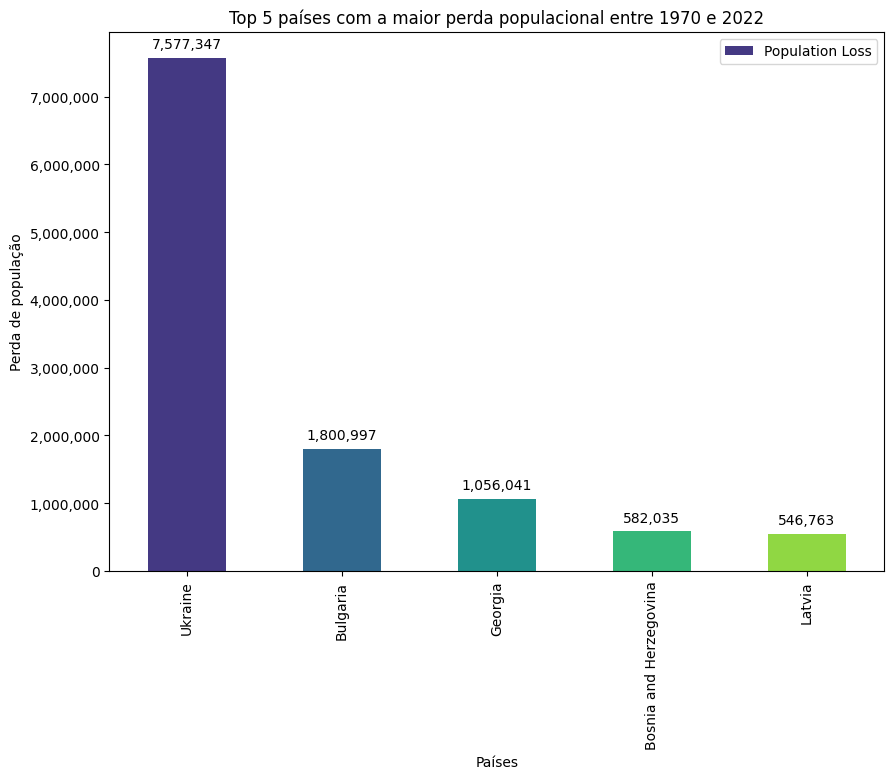

In [55]:
# Plotando o gráfico
ax = top5_loss.plot(kind='bar', x='Country/Territory', y='Population Loss', figsize=(10,7), color=sns.color_palette("viridis", 5))
plt.title('Top 5 países com a maior perda populacional entre 1970 e 2022')
plt.ylabel('Perda de população')
plt.xlabel('Países')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Anotar com os valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## 3.2 Quais países tiveram a maior taxa de crescimento desde 1970 até hoje?

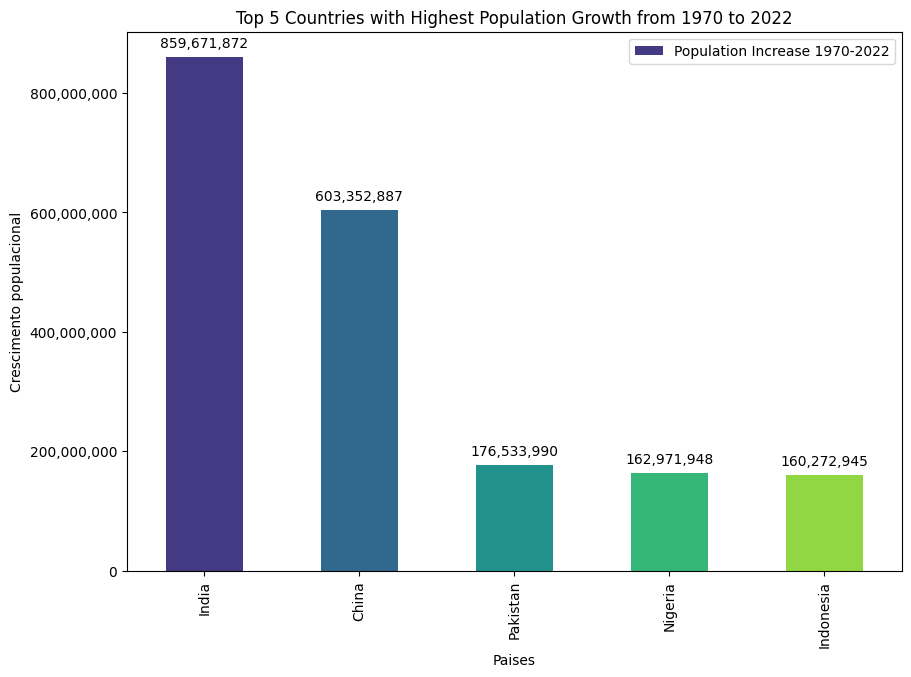

In [57]:
# Plotando o gráfico
ax = top5_growth.plot(kind='bar', x='Country/Territory', y='Population Increase 1970-2022', figsize=(10,7), color=sns.color_palette("viridis", 5))
plt.title('Top 5 Countries with Highest Population Growth from 1970 to 2022')
plt.ylabel('Crescimento populacional')
plt.xlabel('Paises')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Pegando valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

## 3.3 Qual a distribuição populacional nos continentes em 2022?

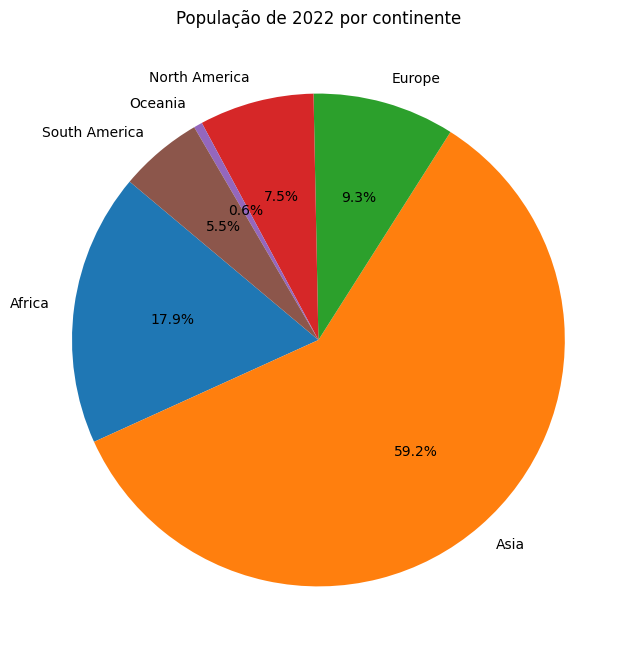

In [38]:
# Calculando a população total por continente
continent_population_2022 = df.groupby('Continent')['2022 Population'].sum()

# Plottando o gráfico
plt.figure(figsize=(10, 8))
plt.pie(continent_population_2022, labels=continent_population_2022.index, autopct='%1.1f%%', startangle=140)
plt.title('População de 2022 por continente')
plt.show()

## 3.4 Qual é a comparação dos países mais populados de 1970 com sua relação nos dias de hoje?

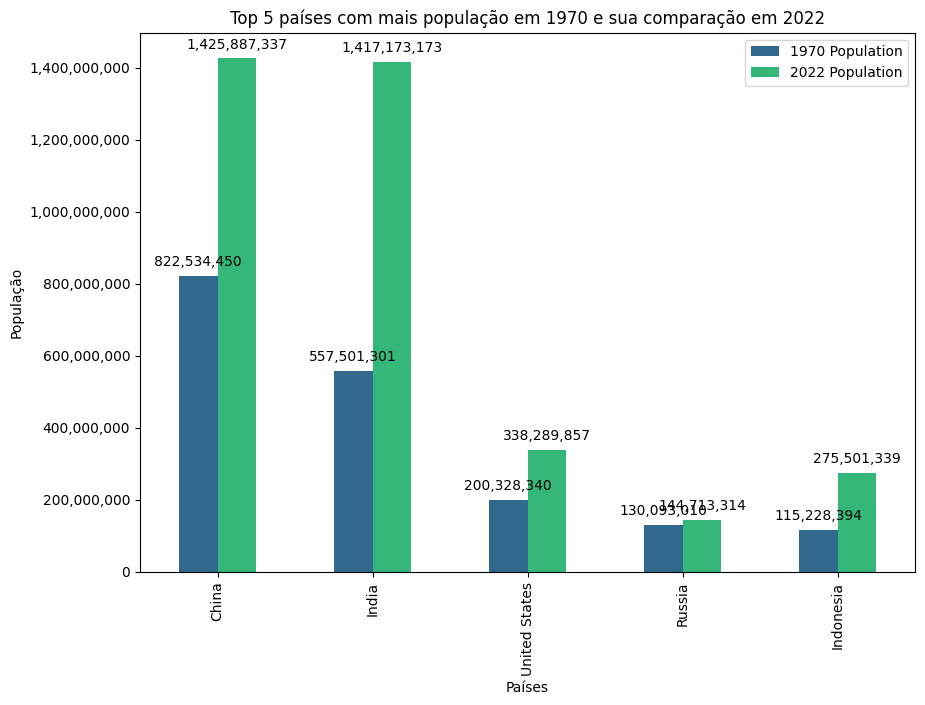

In [53]:
# Pegar os 5 paises mais populados em 1970
top5_1970 = df.nlargest(5, '1970 Population')

# Filtrando as populações de 2022 desses países
top5_1970_2022 = top5_1970[['Country/Territory', '1970 Population', '2022 Population']]

# Plotando o gráfico
ax = top5_1970_2022.plot(kind='bar', x='Country/Territory', y=['1970 Population', '2022 Population'], figsize=(10,7), color=sns.color_palette("viridis", 2))
plt.title('Top 5 países com mais população em 1970 e sua comparação em 2022')
plt.ylabel('População')
plt.xlabel('Países')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Anotando com os valores exatos
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# 4. Análise e Consolidação

Nossa análise abrangente dos dados populacionais globais, abrangendo de 1970 a 2022, revelou uma série de padrões e tendências notáveis. A população mundial aumentou significativamente nesse período, com algumas nações exibindo taxas de crescimento populacional extraordinárias, enquanto outras testemunharam uma queda.

Ao observar as cinco nações que sofreram as maiores perdas populacionais de 1970 a 2022, a Ucrânia emergiu como o país com a maior diminuição, seguido pela Bulgária, Geórgia, Bósnia e Herzegovina e Letônia. Essa queda na população pode estar ligada a uma série de fatores, incluindo, mas não se limitando a, emigração, diminuição da taxa de natalidade, efeitos de conflitos passados e atuais, entre outros. Cada caso oferece um rico terreno para futuras investigações e análises.

Por outro lado, Índia, China, Paquistão, Nigéria e Indonésia emergiram como os países com o maior crescimento populacional de 1970 a 2022. A Índia e a China, em particular, mostraram um aumento surpreendente, com a Índia adicionando mais de 859 milhões à sua população e a China mais de 603 milhões durante esse período. Estes aumentos sem precedentes na população podem ser atribuídos a diversos fatores, incluindo políticas governamentais, melhorias nos cuidados de saúde, efeitos da revolução verde na agricultura, entre outros.

Também foi relevante analisar a distribuição da população entre os continentes. A Ásia é de longe o continente mais populoso, abrigando quase 60% da população mundial em 2022, seguido pela África, Europa, América do Norte, América do Sul e Oceania. Essa distribuição mostra uma clara concentração populacional na Ásia, o que tem implicações significativas para questões de políticas globais, como desenvolvimento econômico, segurança alimentar e mudanças climáticas.

Adicionalmente, examinamos as nações mais populosas em 1970 e comparamos suas populações com as de 2022. Notavelmente, a China e a Índia, que lideravam em 1970, mantiveram suas posições em 2022, apesar do aumento significativo na população em ambos os países. Os Estados Unidos, Rússia e Indonésia completaram os cinco primeiros, cada um com um aumento considerável na população.

Apesar dos insights valiosos gerados por nossa análise, é importante considerar as limitações. A precisão das estimativas populacionais pode ser afetada por vários fatores, incluindo a qualidade dos censos e dos sistemas de registro, bem como a ocorrência de conflitos, desastres naturais e outras crises que podem causar movimentos populacionais significativos. Além disso, nossa análise não considerou variações intra-regionais dentro dos países, o que poderia revelar padrões populacionais mais complexos.

No futuro, recomendamos estudos adicionais para explorar as causas subjacentes das tendências observadas, bem como suas implicações para questões como desenvolvimento, segurança e sustentabilidade. Além disso, a análise de subgrupos dentro dos países - por exemplo, por idade, gênero ou status socioeconômico - pode fornecer insights adicionais sobre a dinâmica populacional.

# 5. Conclusão

No início da seção de conclusão, rememoramos os objetivos da nossa análise, proporcionando um contexto para as conclusões apresentadas. Entre as principais conclusões, destaca-se a ascensão rápida da população na Índia, a diminuição na Ucrânia e a proeminência demográfica da Ásia. Estas conclusões estabelecem uma conexão com as perguntas de pesquisa inicialmente propostas e ilustram como os dados foram utilizados para proporcionar respostas a estas questões.

É válido ressaltar que, apesar das limitações e potenciais vieses na análise, as conclusões obtidas possuem relevância e proporcionam insights valiosos sobre a demografia global. As tendências identificadas podem influenciar decisões e processos em diversas áreas, desde a política até a economia.

A partir desses resultados, sugerimos como recomendação a realização de análises mais detalhadas de subgrupos demográficos, visando um entendimento mais completo das tendências globais. Finalizamos reforçando a importância do estudo da demografia para a compreensão do nosso mundo em constante mudança, e a contribuição do nosso trabalho para tal.

# 6. Referências

[👨‍👩‍👧‍👦World Population 〽️Analysis](https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis)